IIT2021034 UJJWAL NARAYAN PANDRAM  |   Computer Vision Image Captioning

## Image Caption Generator

We are going to use Transformers model to generate caption from an Image.

### Installation



1.   Transformers
2.   Pytorch
3. Image

For installation, please do pip install package_name

In Colab, Pytorch comes preinstalled and same goes with PIL for Image. You will only need to install **transformers** from Huggingface.




In [1]:
!pip install transformers

In [9]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [11]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 3.0 MB/s eta 0:00:00


<ipython-input-22-de15f37e88bc>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  i_image.thumbnail(max_size, Image.ANTIALIAS)


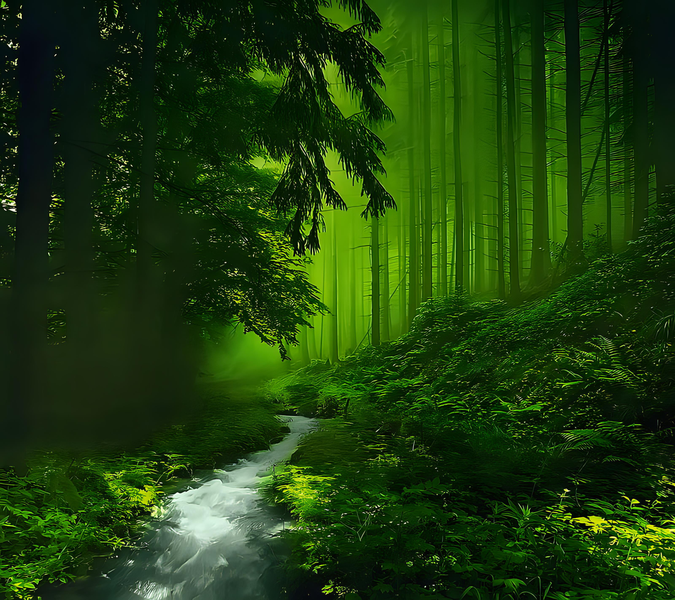

Provided Caption: Greenery is life
Generated Caption: a forest filled with lots of trees and bushes
Similarity Score: 0.26148685812950134



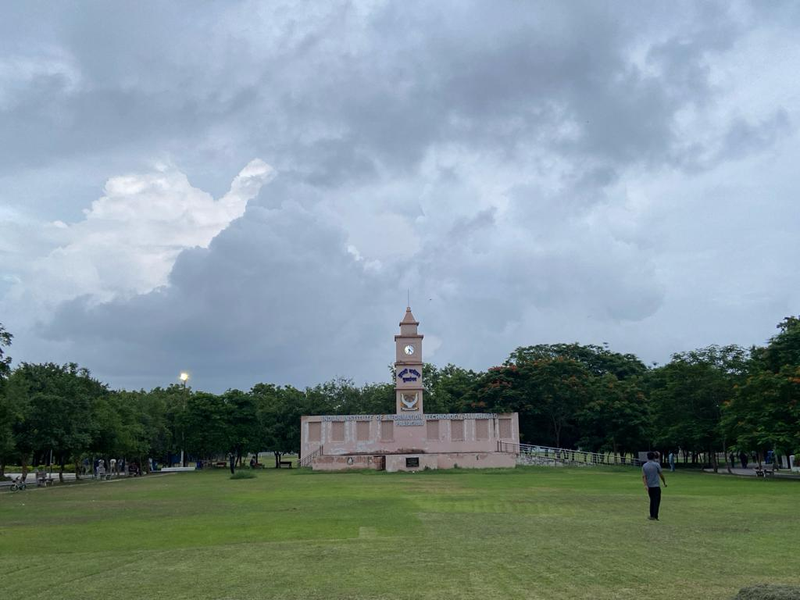

Provided Caption: Clock tower in my College
Generated Caption: a large white building with a clock tower
Similarity Score: 0.652783989906311



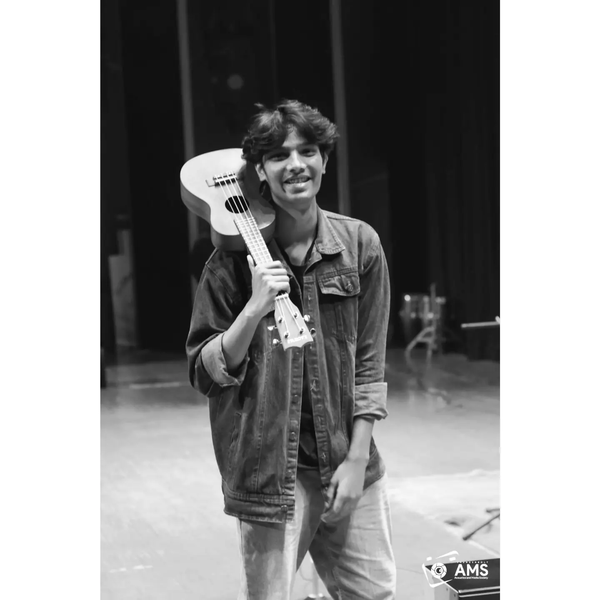

Provided Caption: Me holding Guitar
Generated Caption: a man holding a tennis racquet on a street
Similarity Score: 0.3362374007701874



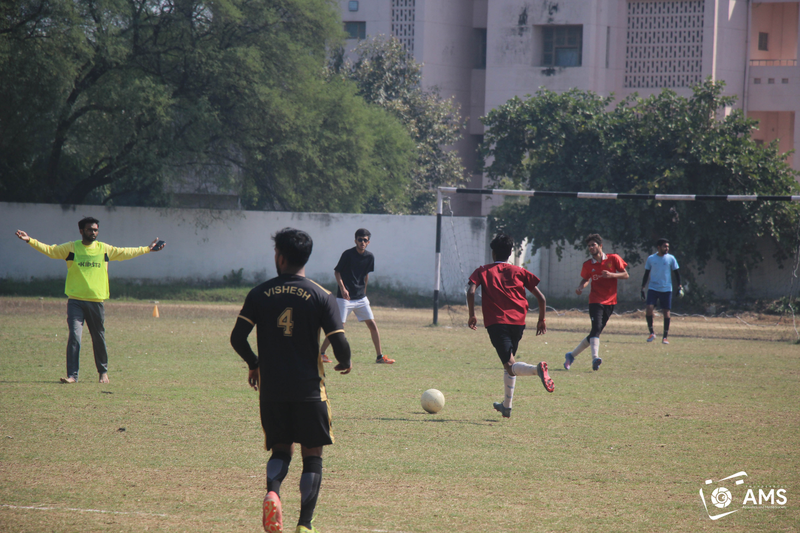

Provided Caption: Playing Football
Generated Caption: young men playing a game of soccer
Similarity Score: 0.3912697434425354



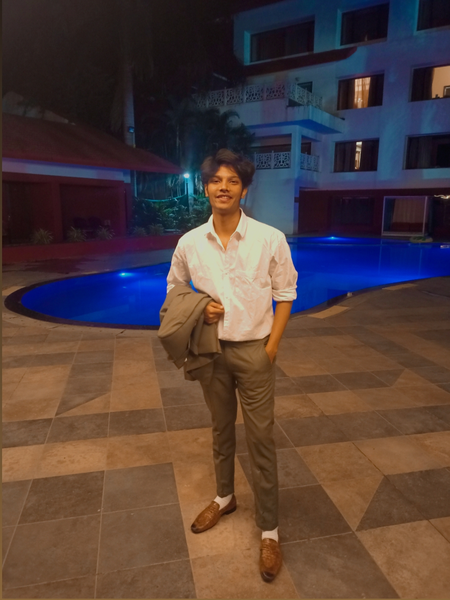

Provided Caption: Me in front of Building.
Generated Caption: a man standing in front of a large building
Similarity Score: 0.49061134457588196



In [22]:
from IPython.display import display
from PIL import Image

# function to include image display with resizing
def predict_and_compare_with_display(image_paths, provided_captions, max_size=(800, 600)):
    assert len(image_paths) == len(provided_captions), "Each image must have a corresponding provided caption."

    for image_path, provided_caption in zip(image_paths, provided_captions):
        # Load the image
        i_image = Image.open(image_path)

        # Resize the image to fit within the specified max_size while maintaining aspect ratio
        i_image.thumbnail(max_size, Image.ANTIALIAS)

        # Display the resized image
        display(i_image)

        if i_image.mode != "RGB":
            i_image = i_image.convert("RGB")

        # Process the image and generate a caption
        pixel_values = feature_extractor(images=[i_image], return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)
        output_ids = model.generate(pixel_values, **gen_kwargs)
        generated_caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()

        # Calculate similarity score
        provided_emb = embedder.encode(provided_caption, convert_to_tensor=True)
        generated_emb = embedder.encode(generated_caption, convert_to_tensor=True)
        cosine_scores = util.pytorch_cos_sim(provided_emb, generated_emb)
        similarity_score = cosine_scores.item()

        # Print captions and similarity score
        print(f"Provided Caption: {provided_caption}")
        print(f"Generated Caption: {generated_caption}")
        print(f"Similarity Score: {similarity_score}\n")

#5 images with adjusted image display
image_paths = ['/content/1.jpeg', '/content/Clock_tower.jpeg', '/content/Guitar.jpg', '/content/fball.jpg', '/content/Men_in_Formals .jpg']  # Update these paths
provided_captions = [
    'Greenery is life',
    'Clock tower in my College',
    'Me holding Guitar',
    'Playing Football',
    'Me in front of Building.'
]  # Update these captions accordingly
predict_and_compare_with_display(image_paths, provided_captions)


 Now Comments Based On my results above

 **Refereces of Image**

 Here **I'Ve used my images** and Images from Google
 2 Image is Mine,2 are clicked by Me,playing Football and Clock tower one and that forest image is AI Generated

**1.Greenery is life vs. a forest filled with lots of trees and bushes (0.2615)**

The **low score** reflects a difference in the abstract versus specific descriptions of nature. "Greenery is life" conveys a broader sentiment than the more literal scene described by the model, illustrating a gap in capturing the philosophical essence.



**2. Clock tower in my College vs. a large white building with a clock tower (0.6528)**

The **highest similarity** score here highlights the model's accuracy in capturing both the clock tower and the building. However, it misses the personal connection to "my College," suggesting good scene comprehension with room for improvement in personal relevance.

**3. Me holding Guitar vs. a man holding a tennis racquet on a street (0.3362)**

This shows a clear misunderstanding by the model, mistaking the object being held. The significant discrepancy between "Guitar" and "tennis racquet" leads to the lowest similarity score among the examples.


**4. Playing Football vs. young men playing a game of soccer (0.3913)**

Despite a lower score, the model's caption aligns well with the activity described. The difference likely stems from the specificity in describing the players and the use of "soccer" instead of "football," reflecting a slight variance in interpretation.

**5. Me in front of Building vs. a man standing in front of a large building (0.4906)**

The moderate similarity score suggests the model grasped the scene's essentials (a person and a building) but missed the personalized aspect of "Me". It indicates an accurate, albeit generic, understanding.

